In [ ]:
# Task 1: Iris Species Classification using Scikit-learn

# Import Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Simulate missing values for practice (optional)
# Comment this out if you're not testing missing value handling
df.iloc[0, 0] = np.nan

# Handle Missing Values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)  # Replace NaNs with column means

# Encode Labels
X = df.drop('species', axis=1)
y = df['species']

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8963 - loss: 0.3360 - val_accuracy: 0.9865 - val_loss: 0.0484
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9895 - val_loss: 0.0387
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9899 - loss: 0.0338 - val_accuracy: 0.9872 - val_loss: 0.0486
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9914 - loss: 0.0250 - val_accuracy: 0.9912 - val_loss: 0.0352
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9922 - val_loss: 0.0322
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9835 - loss: 0.0497

Test Accuracy: 0.9882
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


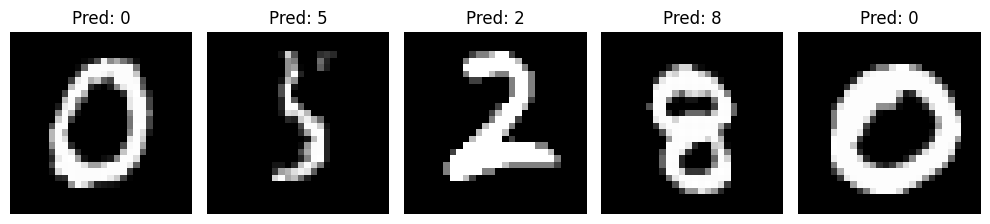

In [ ]:
# Task 2: MNIST Digit Classification using a CNN in TensorFlow

# Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and Preprocess MNIST Dataset
# MNIST contains 70,000 images of handwritten digits (28x28 grayscale)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to add a channel dimension (required for CNN input)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

#  Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

# Compile the model with loss function, optimizer and metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

# Train the Model
# We'll train for 5 epochs and reserve 10% of training data for validation
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the Model on the Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Visualize Predictions on 5 Random Test Images

# Generate predictions for the test set
predictions = model.predict(X_test)

# Plot 5 random test samples with their predicted labels
plt.figure(figsize=(10, 4))
for i in range(5):
    index = np.random.randint(0, len(X_test))
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[index])}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Task 3: NLP with spaCy – Named Entity Recognition & Rule-based Sentiment

# Import spaCy

import spacy
from spacy import displacy

# Load spaCy English language model

nlp = spacy.load("en_core_web_sm")

# Sample Amazon Product Reviews
reviews = [
    "I love my new Apple AirPods Pro – the sound is amazing and the fit is perfect!",
    "This Samsung TV has terrible image quality. I'm really disappointed.",
    "Logitech MX Master 3 is the best mouse I’ve ever used. Super smooth and ergonomic.",
    "Avoid this Sony phone at all costs – it's buggy and slow.",
    "The Kindle Paperwhite is excellent for reading, especially in bright sunlight!"
]

# Named Entity Recognition (NER)
print("🔍 Named Entities (Product Names & Brands):\n")

for review in reviews:
    doc = nlp(review)
    print(f"Review: {review}")
    for ent in doc.ents:
        print(f"  ➤ Entity: {ent.text} | Label: {ent.label_}")
    print("-" * 60)

# Simple Rule-Based Sentiment Analysis

positive_words = ["love", "amazing", "best", "excellent", "perfect", "smooth"]
negative_words = ["terrible", "disappointed", "buggy", "slow", "avoid"]

def analyze_sentiment(text):
    text = text.lower()
    pos_score = sum(word in text for word in positive_words)
    neg_score = sum(word in text for word in negative_words)
    
    if pos_score > neg_score:
        return "Positive"
    elif neg_score > pos_score:
        return "Negative"
    else:
        return "Neutral"

print("🧠 Sentiment Analysis Results:\n")
for review in reviews:
    sentiment = analyze_sentiment(review)
    print(f"Review: {review}\n  ➤ Sentiment: {sentiment}")
    print("-" * 60)

